In [119]:
""" Overview:

We want to establish the relationship between a categorical outcome Y given features (x_1, x_2, ..., x_n) 
that we can use to predict Y. This is called logistic regression.

As a case study, we will predict housing prices. We will use pandas to load, matplotlib to plot, and numpy to do 
basic math computations. The process is as follows:

(0) load data
(1) normalize data (x - mean(x))/(std(x)), same for y
(2) cat bias to each of the x's
(3) initialize weights
(4) define cost:1/n * sum((-y_i.T * sigmoid(x.T @ weights) - (1-y).T * (1 - sigmoid(x.T @ weights)))
(5) define loss: 1/n * ()


IMPROVEMENT IDEAS: 
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
# Load in our data easily using pandas and display a few rows
data = pd.read_csv('../data/iris.txt',names=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"])
print(data.head(), '\n')

# Normalization is super important so that no feature dominates all the others.
# We can call this the isotropic assumption (features are all measured in the
# same way across different directions).

# Note we exclude the species (y) column because it is categorical.
data.iloc[:, :-1] = (data.iloc[:, :-1] - data.iloc[:, :-1].mean())/data.iloc[:, :-1].std()
print(data.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa 

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0      -0.897674      1.028611      -1.336794     -1.308593  Iris-setosa
1      -1.139200     -0.124540      -1.336794     -1.308593  Iris-setosa
2      -1.380727      0.336720      -1.393470     -1.308593  Iris-setosa
3      -1.501490      0.106090      -1.280118     -1.308593  Iris-setosa
4      -1.018437      1.259242      -1.336794     -1.308593  Iris-setosa


In [7]:
def sigmoid(z):
    """ Sigmoid activation function 
    """
    return 1. / (1. + np.exp(-z))

In [19]:
def compute_error(x, y, weights):
    """ Cost function for logistic regression
    """
    h = sigmoid(x @ weights.T)
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [9]:
def compute_gradient(x, y, weights):
    """ Update weights given predictions, labels, learning rate, and weights matrix
    Includes prediction as part of the computation
    """
    h = sigmoid(x @ weights.T)
    return (1/len(x)) * x.T @ (h - y)

In [112]:
def train(x, y, weights, iters, lr, stop_threshold=1e-5):
    """ Function to train
    """
    cost = np.zeros(iters)
    for i in range(iters):
        grad = compute_gradient(x, y, weights)
        weights = weights - lr*grad
        cost[i] = compute_error(x, y, weights)
        
        if i % 100 == 0:
            print('Cost at time step %d: %f'%(i, cost[i]))
            if abs(cost[i] - cost[i-1]) < stop_threshold:
                print('\nEARLY STOPPED.')
                cost = cost[:i]
                break
    
    return weights, cost

In [113]:
def predict(x, weights, threshold=0.5):
    """ Prediction function
    """
    h = sigmoid(x @ weights.T)
    return h >= threshold

Cost at time step 0: 0.637007
Cost at time step 100: 0.078100
Cost at time step 200: 0.044617
Cost at time step 300: 0.031864
Cost at time step 400: 0.025053
Cost at time step 500: 0.020782
Cost at time step 600: 0.017839
Cost at time step 700: 0.015678
Cost at time step 800: 0.014020
Cost at time step 900: 0.012704
Cost at time step 1000: 0.011632

EARLY STOPPED.


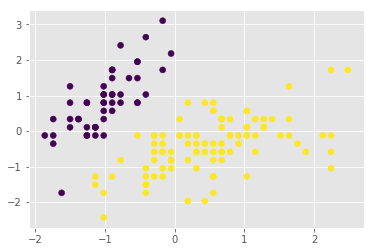

In [120]:
# Get up to the last column of our dataframe, which we assume is our Y
features = data.iloc[:, :-1]

# Bias terms
bias = np.ones([features.shape[0], 1])

# Cat bias with feature values
x = np.concatenate((bias, features), axis=1)

# Separate out y, combine two of the y's so it's binary
labels = {key: idx for idx, key in enumerate(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'])}
y = np.array([labels[i] for i in data.iloc[:, -1]]).T
y = (y != 0)*1

# Plot what y's look like against first two features (they are linearly separable)
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y)
plt.plot()

# Initialize weights matrix
weights = np.zeros(x.shape[1])

# Initialize learning rate, iterations
lr, iters = 0.1, 10000

# Train
weights, cost = train(x, y, weights, iters, lr)

In [121]:
# Accuracy
(predict(x, weights) == y).mean()

1.0

Text(0.5,1,'Error vs. Training Epoch')

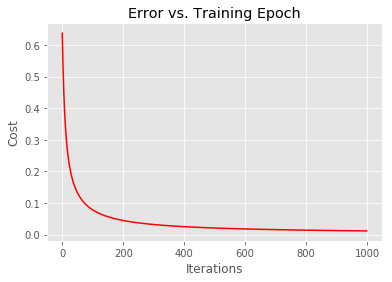

In [122]:
#plot the cost
fig, ax = plt.subplots()  
ax.plot(range(len(cost)), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch') 